## COVID-19 PREDICTION

#### Aim: To build a classification model to predict the corona_result of individuals

test_date indicates the date that a particular peson was tested

age_60_and_above - indicates whether a particular person was above 60 years(Yes) or not(No)

gender - This is basically the sex of the person being tested: male, female

corona_result - Is the final finding; did the person test positive for covid or negative

test_indication - Is the primary reason for testing; either the person was abroad, in contact with confirmed cases or other reasons

Symptoms

1. cough
2. fever
3. sore_throat
4. shortness_of_breath
5. head_ache 

A '1' in the above named columns indicates positive test for the symptom and a '0' indicates negative test.


In [1]:
#Including the general libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reading from the csv file
covid = pd.read_csv("corona.csv")

#use pandas dataframe
covid_df = pd.DataFrame(covid)

C:\Users\Nkatha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#info of data

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


### Data Cleaning

In [3]:
covid_df['corona_result'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [4]:
covid_df.replace(to_replace = {'corona_result': 'other'}, value = 'negative', inplace = True)

In [5]:
covid_df['corona_result'].unique()

array(['negative', 'positive'], dtype=object)

In [6]:
covid_df['fever'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [7]:
covid_df['fever'].dtype

dtype('O')

In [8]:
covid_df.replace(to_replace = {'fever': '0'}, value = 0, inplace = True)
covid_df.replace(to_replace = {'fever': '1'}, value = 1, inplace = True)
covid_df.replace(to_replace = {'fever': 'None'}, value = 0, inplace = True)

In [9]:
covid_df['fever'].dtype

dtype('int64')

In [10]:
covid_df['fever'].unique()

array([0, 1], dtype=int64)

Cough

In [11]:
covid_df['cough'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [12]:
covid_df.replace(to_replace = {'cough': '0'}, value = 0, inplace = True)
covid_df.replace(to_replace = {'cough': '1'}, value = 1, inplace = True)
covid_df.replace(to_replace = {'cough': 'None'}, value = 0, inplace = True)

covid_df['cough'].dtype

dtype('int64')

In [13]:
covid_df['cough'].unique()

array([0, 1], dtype=int64)

Sore_throat

In [14]:
covid_df['sore_throat'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [15]:
covid_df.replace(to_replace = {'sore_throat': '0'}, value = 0, inplace = True)
covid_df.replace(to_replace = {'sore_throat': '1'}, value = 1, inplace = True)
covid_df.replace(to_replace = {'sore_throat': 'None'}, value = 0, inplace = True)

covid_df['sore_throat'].dtype

dtype('int64')

In [16]:
covid_df['sore_throat'].unique()

array([0, 1], dtype=int64)

Headache

In [17]:
covid_df['head_ache'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [18]:
covid_df.replace(to_replace = {'head_ache': '0'}, value = 0, inplace = True)
covid_df.replace(to_replace = {'head_ache': '1'}, value = 1, inplace = True)
covid_df.replace(to_replace = {'head_ache': 'None'}, value = 0, inplace = True)

covid_df['head_ache'].dtype

dtype('int64')

In [19]:
covid_df['head_ache'].unique()

array([0, 1], dtype=int64)

Shortness of breath

In [20]:
covid_df['shortness_of_breath'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [21]:
covid_df.replace(to_replace = {'shortness_of_breath': '0'}, value = 0, inplace = True)
covid_df.replace(to_replace = {'shortness_of_breath': '1'}, value = 1, inplace = True)
covid_df.replace(to_replace = {'shortness_of_breath': 'None'}, value = 0, inplace = True)

covid_df['shortness_of_breath'].dtype

dtype('int64')

In [22]:
covid_df['shortness_of_breath'].unique()

array([0, 1], dtype=int64)

In [23]:
#Info of the data
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  int64 
 2   fever                278848 non-null  int64 
 3   sore_throat          278848 non-null  int64 
 4   shortness_of_breath  278848 non-null  int64 
 5   head_ache            278848 non-null  int64 
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: int64(5), object(5)
memory usage: 21.3+ MB


In [24]:
covid_df['age_60_and_above'].unique()


array(['None', 'Yes', 'No'], dtype=object)

In [25]:
covid_df.replace(to_replace = {'age_60_and_above': 'None'}, value = 'No', inplace = True)

covid_df['age_60_and_above'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  int64 
 2   fever                278848 non-null  int64 
 3   sore_throat          278848 non-null  int64 
 4   shortness_of_breath  278848 non-null  int64 
 5   head_ache            278848 non-null  int64 
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: int64(5), object(5)
memory usage: 21.3+ MB


In [27]:
covid_df['gender'].unique()

array(['female', 'male', 'None'], dtype=object)

In [28]:
covid_df['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [29]:
#check for duplicates
covid_df.duplicated().sum()

272850

In [30]:
#eliminate duplicates
covid_df.drop_duplicates()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,No,female,Other
1,2020-04-30,1,0,0,0,0,negative,No,female,Other
2,2020-04-30,0,1,0,0,0,negative,No,male,Other
4,2020-04-30,1,0,0,0,0,negative,No,male,Other
6,2020-04-30,1,1,0,0,0,negative,No,male,Abroad
...,...,...,...,...,...,...,...,...,...,...
278829,2020-03-11,0,0,1,0,1,positive,No,None,Other
278830,2020-03-11,0,1,0,0,0,positive,No,None,Contact with confirmed
278831,2020-03-11,1,1,1,0,1,positive,No,None,Abroad
278833,2020-03-11,0,1,1,0,0,positive,No,None,Abroad


In [31]:
#check for missing values
covid_df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [32]:
covid_df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000
mean,0.151437,0.078007,0.006907,0.005655,0.008657
std,0.358475,0.268183,0.082821,0.074990,0.092640
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
covid_df['gender'].value_counts()

female    130158
male      129127
None       19563
Name: gender, dtype: int64

In [34]:
covid_df.replace(to_replace = {'gender': 'None'}, value = 'female', inplace = True)

## Data Visualization

In [35]:
covid_df['corona_result'].value_counts()

negative    264119
positive     14729
Name: corona_result, dtype: int64

[Text(0.5, 1.0, 'Corona results')]

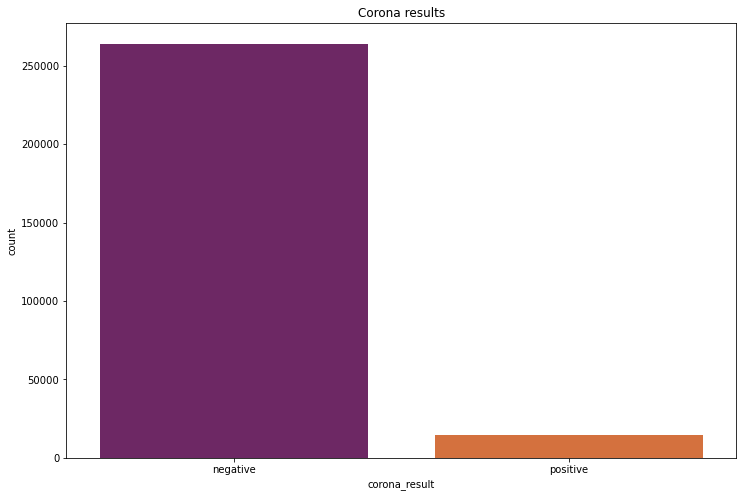

In [36]:
#Number of positive and negative cases

plt.figure(figsize = (12,8))
sns.countplot(x = 'corona_result', data = covid_df, palette = 'inferno').set(title = 'Corona results')

                            Most people tested negative

[Text(0.5, 1.0, 'Covid results and gender of tested')]

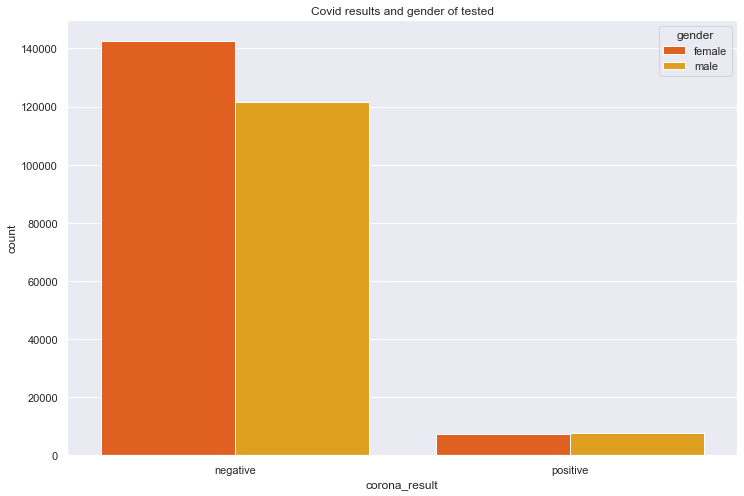

In [37]:
#Gender of tested people and their results
sns.set(rc = {'figure.figsize': (12,8)})
sns.countplot(x = 'corona_result', hue = 'gender',
              data = covid_df, palette = 'autumn').set(title = 'Covid results and gender of tested')

                            Slightly more males than females tested positive

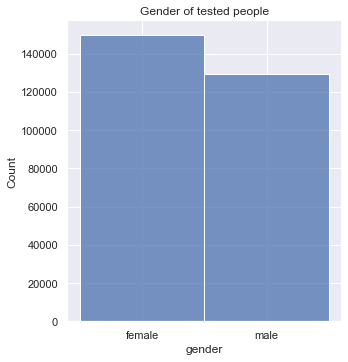

In [38]:
#Overall gender of tested people
sns.displot(x = 'gender', data = covid_df, palette = 'husl').set(title = 'Gender of tested people')

                                 Generally, Females were a majority

[Text(0, 0.5, 'No of people'), Text(0.5, 1.0, 'Age_60_and_above')]

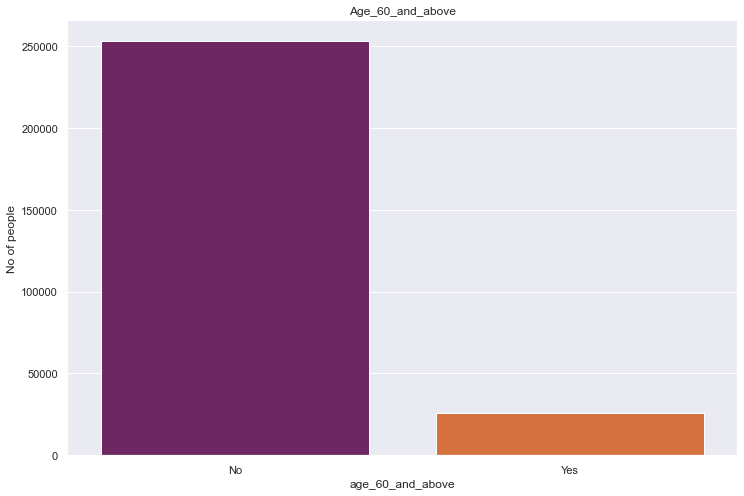

In [39]:
#How many People are above 60? 
sns.countplot(x = 'age_60_and_above',
              data = covid_df, palette = 'inferno').set(ylabel = 'No of people', title ='Age_60_and_above')

            Most of the tested people are below 60

In [40]:
above_60_yrs = covid_df.loc[covid_df['age_60_and_above']  == 'Yes']

[Text(0.5, 1.0, 'Corona Results of people above 60 years')]

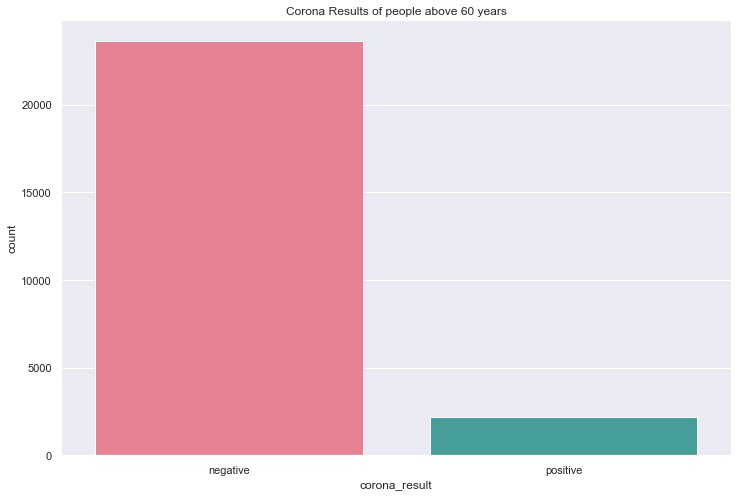

In [41]:
#results for people above 60
sns.countplot(x = 'corona_result', data = above_60_yrs, palette = 'husl').set(title = 'Corona Results of people above 60 years')

                        A majority of people tested above 60 years tested negative

[Text(0.5, 1.0, 'Overall Gender of people above 60 years')]

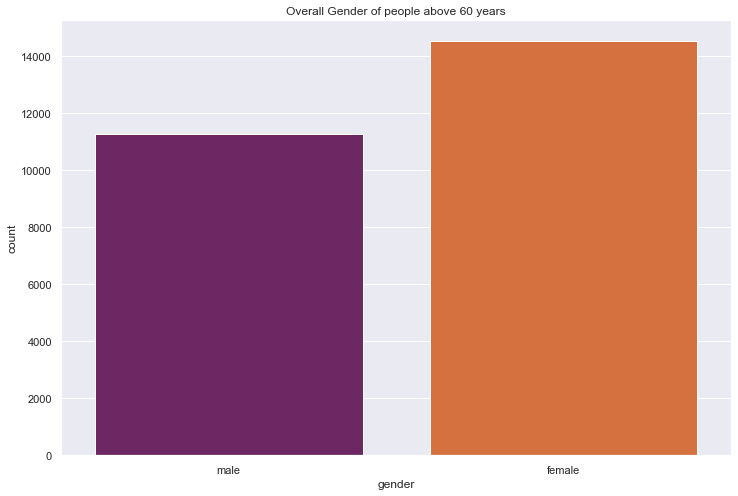

In [42]:
#Gender of people above 60
sns.countplot(x = 'gender', data = above_60_yrs, palette = 'inferno').set(title = 'Overall Gender of people above 60 years')

                        A majority of people above 60 years were females

[Text(0, 0.5, 'No of people'),
 Text(0.5, 1.0, 'Gender of positive cases for people age 60 and above')]

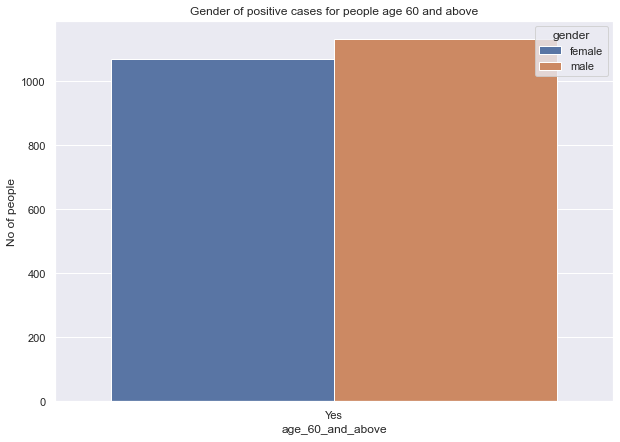

In [43]:
positive_above_60 = covid_df.loc[(covid_df['corona_result'] == 'positive') & (covid_df['age_60_and_above'] == 'Yes')]

sns.set(rc = {'figure.figsize': (10,7)})
sns.countplot(x = 'age_60_and_above', 
              hue = 'gender', 
              data = positive_above_60).set(ylabel = 'No of people', title = 'Gender of positive cases for people age 60 and above')

                             A majority of people above 60 who tested positive were males

[Text(0.5, 1.0, 'Test indication of positive cases')]

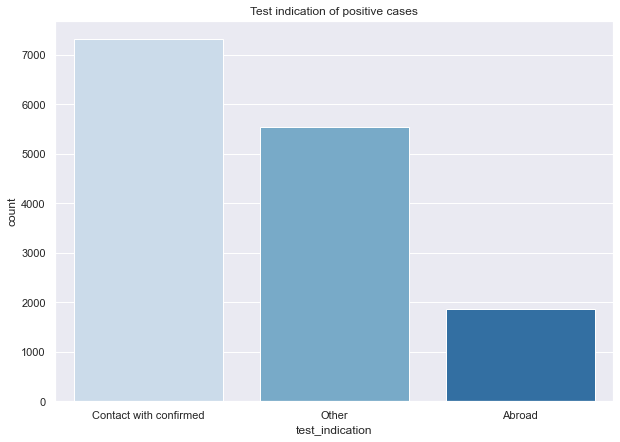

In [44]:
#Test indication of positive cases
positive = covid_df.loc[(covid_df['corona_result'] == 'positive')]
sns.countplot(x = 'test_indication', data = positive, palette = 'Blues').set(title = 'Test indication of positive cases')

[Text(0.5, 1.0, 'test_indication for positive cases and the genders')]

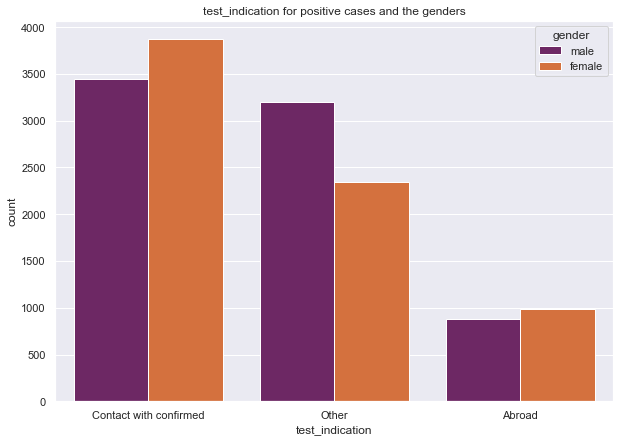

In [45]:
#Gender and test_indication for positive cases
sns.countplot(x = 'test_indication', hue = 'gender', palette = 'inferno',
              data = positive).set(title = 'test_indication for positive cases and the genders')

    Test Indication                
    Other                        More males than females 
    Contact with confirmed       More females than males had contact with confirmed cases
    Abroad                       More females than males

##### Checking for Most common Symptoms among positive cases

In [46]:
positive['cough'].value_counts()

0    8145
1    6584
Name: cough, dtype: int64

In [47]:
positive['fever'].value_counts()

0    9170
1    5559
Name: fever, dtype: int64

In [48]:
positive['head_ache'].value_counts()

0    12494
1     2235
Name: head_ache, dtype: int64

In [49]:
positive['sore_throat'].value_counts()

0    13203
1     1526
Name: sore_throat, dtype: int64

In [50]:
positive['shortness_of_breath'].value_counts()

0    13565
1     1164
Name: shortness_of_breath, dtype: int64

            Cough and fever were the most common symptoms for positive cases with 6584 and 5559 cases respectively

In [51]:
result_mapping = {'negative': 0, 'positive': 1}

covid_df['corona_result'].replace(result_mapping, inplace= True)

In [52]:
gender_mapping = {'female': 0, 'male': 1}

covid_df['gender'].replace(gender_mapping, inplace= True)

In [53]:
test_mapping = {'Contact with confirmed': 0, 'Abroad': 1, 'Other': 2}

covid_df['test_indication'].replace(test_mapping, inplace= True)

### Extracting month date and year

In [54]:
from datetime import datetime
def time_column_gen(time_column, data, to_drop = False):
    
  # Extract values of time
    time_values = data[time_column].values

  # Extract month, year, day and day of week from startdate
    month = [datetime.strptime(value, '%Y-%m-%d').month for value in time_values]
    year = [datetime.strptime(value, '%Y-%m-%d').year for value in time_values]
    day = [datetime.strptime(value, '%Y-%m-%d').day for value in time_values]
    day_of_week = [datetime.strptime(value, '%Y-%m-%d').isoweekday() for value in time_values] 

  # create columns
    data['Month'] = month
    data['Year'] = year
    data['Day'] = day
    data['Day_of_week'] = day_of_week

# drop original column
    if to_drop:
        new_data = data.drop(time_column, axis=1)
    else:
        new_data = data.copy()
    return new_data


In [55]:
corona = time_column_gen('test_date', covid_df, True)

In [56]:
corona.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Month,Year,Day,Day_of_week
0,0,0,0,0,0,0,No,0,2,4,2020,30,4
1,1,0,0,0,0,0,No,0,2,4,2020,30,4
2,0,1,0,0,0,0,No,1,2,4,2020,30,4
3,1,0,0,0,0,0,No,0,2,4,2020,30,4
4,1,0,0,0,0,0,No,1,2,4,2020,30,4


### Convert categorical to numerical data

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

corona.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication',
       'Month', 'Year', 'Day', 'Day_of_week'],
      dtype='object')

In [58]:
categorical_columns = [column for column in corona.columns if corona[column].dtype == 'object']
for column in categorical_columns:
    corona[column] = encoder.fit_transform(corona[column])

### Drop Unnecessary columns

<AxesSubplot:>

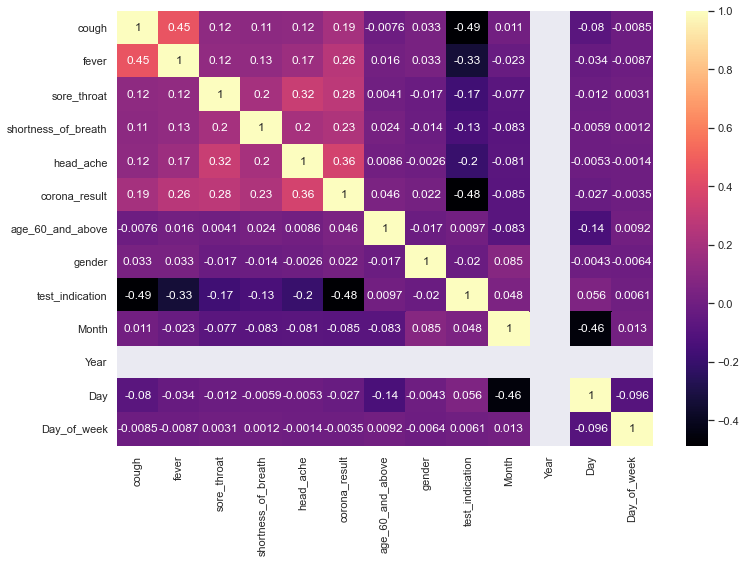

In [59]:
corr_matrix = corona.corr()

sns.set(rc = {'figure.figsize': (12,8)})
sns.heatmap(corr_matrix, cmap='magma', annot=True)

In [60]:
corona.drop(['Year', 'Day_of_week'], axis=1, inplace=True)

In [61]:
corona.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Month,Day
0,0,0,0,0,0,0,0,0,2,4,30
1,1,0,0,0,0,0,0,0,2,4,30
2,0,1,0,0,0,0,0,1,2,4,30
3,1,0,0,0,0,0,0,0,2,4,30
4,1,0,0,0,0,0,0,1,2,4,30


### Modelling - Classification

In [62]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report

In [63]:
#Splitting data
x = corona.drop('corona_result', axis = 1)
y = corona['corona_result']

In [64]:
#Train
x_train, x_hold, y_train, y_hold = train_test_split(x, y)

#Test and validate
x_test, x_val, y_test, y_val = train_test_split(x_hold, y_hold)

In [65]:
x_train

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,Month,Day
29108,0,0,0,0,0,0,0,2,4,26
272607,0,0,0,0,0,0,0,2,3,18
268961,0,1,0,1,0,0,0,0,3,19
34244,0,0,0,0,0,0,0,2,4,25
150090,0,0,0,0,0,0,1,2,4,10
...,...,...,...,...,...,...,...,...,...,...
29665,0,0,0,0,0,0,0,2,4,26
112338,1,1,0,0,0,0,1,1,4,16
63517,0,0,0,0,0,0,1,2,4,21
66836,0,0,0,0,0,0,0,2,4,21


In [66]:
def model_trainer(models, x_train, x_val, y_train, y_val):
    
    for model in models:
        
        #trains models
        model.fit(x_train, y_train)
        
        #test
        predictions = model.predict(x_val)
        print(model)
        
        
        print(classification_report(y_val, predictions))
        print('*'*50)

In [67]:
#instantiate models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


models = [dt, rf, gb]

In [68]:
model_trainer(models, x_train, x_val, y_train, y_val)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16490
           1       0.80      0.59      0.68       938

    accuracy                           0.97     17428
   macro avg       0.89      0.79      0.83     17428
weighted avg       0.97      0.97      0.97     17428

**************************************************
RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16490
           1       0.80      0.62      0.70       938

    accuracy                           0.97     17428
   macro avg       0.89      0.80      0.84     17428
weighted avg       0.97      0.97      0.97     17428

**************************************************
GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16490
           1       0.79      0.61      0.69       938

 

### Saving the models

In [69]:
import joblib

joblib.dump(gb, 'gradientBoosting.pkl')

['gradientBoosting.pkl']

In [70]:
joblib.dump(rf, 'RandomForest.pkl')

['RandomForest.pkl']

In [71]:
joblib.dump(dt, 'DecisionTree.pkl')

['DecisionTree.pkl']